# Data analysis project on Income data set 

## Project Overview

The main task is to carryout an exploratory data analysis and apply some of the learned methodologies. The data set I will be working on is about incomes.

## Importing libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import chi2_contingency, zscore
from sklearn.manifold import MDS
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy.cluster.hierarchy import ward, fcluster, dendrogram, linkage
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, train_test_split, cross_val_score, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, accuracy_score, recall_score, fbeta_score, roc_auc_score,roc_curve, precision_score
import warnings
warnings.filterwarnings("ignore")
warnings.resetwarnings()

## Understanding the dataset

### Loading

Loading the dataset.

In [2]:
# From csv file to dataframe
raw_df = pd.read_csv("/Users/emmatosato/Documents/UNI Locale/Erasmus/Statistical Computing/StatisticalComputing_Project/data50_synth.csv")

### Data set informations 

Retrieving some information about the data set.

In [3]:
# Number of rows and columns
raw_df.shape

(10000, 52)

In [4]:
# Informations about the data set
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      10000 non-null  int64 
 1   income_level    10000 non-null  int64 
 2   sex             10000 non-null  object
 3   age             10000 non-null  int64 
 4   town            10000 non-null  object
 5   occupation      10000 non-null  object
 6   height          10000 non-null  int64 
 7   1sibling        10000 non-null  int64 
 8   2home           10000 non-null  int64 
 9   3educ           10000 non-null  int64 
 10  4travel         10000 non-null  int64 
 11  5credit         10000 non-null  int64 
 12  6cr sum         10000 non-null  int64 
 13  7card           10000 non-null  int64 
 14  8pastime        10000 non-null  int64 
 15  9changes        10000 non-null  int64 
 16  10daily travel  10000 non-null  int64 
 17  11travel mode   10000 non-null  int64 
 18  12consc

The main aspect that we can hightlight is that the majority of the variables (49) are integer values (numeric and dummy variables).

In [5]:
# Column's names
raw_df.columns

Index(['Unnamed: 0', 'income_level', 'sex', 'age', 'town', 'occupation',
       'height', '1sibling', '2home', '3educ', '4travel', '5credit', '6cr sum',
       '7card', '8pastime', '9changes', '10daily travel', '11travel mode',
       '12conscious', '13accounts', '14sum', '15mobile', '16mobtime', '17car',
       '18internet', '19sport', '20vegan', '21civil', '22polit', '23ill',
       '24medicine', '25doctor', '26covid', '27advert', '28culture', '29food',
       '30children', '31rooms', '32valuables', '33cloths', '34jewels',
       '35smoke', '36alcohol', '37music', '38face', '39twitter', '40online1',
       '41online2', '42TV', '43refurb', '44move', '45travdest'],
      dtype='object')

In [6]:
# First 5 rows 
raw_df.head(5)

,Unnamed: 0,income_level,sex,age,town,occupation,height,1sibling,2home,3educ,...,36alcohol,37music,38face,39twitter,40online1,41online2,42TV,43refurb,44move,45travdest
0,0,1,female,60,Nagykanizsa,Szakorvos,168,3,0,4,...,1,2,1,0,2,2,0,1,1,1
1,1,1,male,40,Nagykanizsa,Lakatos,170,4,0,3,...,1,0,0,0,1,2,1,1,1,1
2,2,0,male,49,Budakeszi,asztalos,196,3,0,1,...,3,2,0,0,0,0,1,0,1,1
3,3,0,male,47,Nagykanizsa,Szakorvos,166,0,0,3,...,3,1,1,0,2,0,1,1,0,1
4,4,0,female,41,Budakeszi,asztalos,173,3,0,3,...,1,2,1,0,0,0,1,1,0,1


In [7]:
# Last 5 rows 
raw_df.tail(5)

,Unnamed: 0,income_level,sex,age,town,occupation,height,1sibling,2home,3educ,...,36alcohol,37music,38face,39twitter,40online1,41online2,42TV,43refurb,44move,45travdest
9995,9995,0,female,44,Budakeszi,Lakatos,168,0,2,1,...,1,2,1,0,1,0,0,0,0,1
9996,9996,0,male,54,Nagykanizsa,Lakatos,172,0,0,4,...,1,2,0,0,1,2,0,0,0,1
9997,9997,1,female,62,Nagykanizsa,Lakatos,192,4,0,3,...,0,2,0,0,2,2,1,1,1,4
9998,9998,1,male,56,Budakeszi,Szakorvos,164,0,0,2,...,1,2,0,0,1,2,0,1,0,2
9999,9999,0,male,58,Nagykanizsa,Lakatos,171,3,0,0,...,1,2,0,0,1,0,0,0,0,3


### Columns meaning

In [8]:
# number of unique values for each variable
raw_df.nunique(axis=0)

Unnamed: 0        10000
income_level          2
sex                   2
age                  41
town                  3
occupation            3
height               60
1sibling              5
2home                 3
3educ                 5
4travel               2
5credit               2
6cr sum               4
7card                 2
8pastime             12
9changes              4
10daily travel       31
11travel mode         5
12conscious           2
13accounts            2
14sum              5398
15mobile              2
16mobtime             2
17car                 2
18internet            2
19sport               2
20vegan               2
21civil               2
22polit               2
23ill                 2
24medicine            2
25doctor              6
26covid               4
27advert              2
28culture             5
29food                5
30children            5
31rooms               5
32valuables        2769
33cloths              4
34jewels              4
35smoke         

We can see most of the variables have from 2 up to 5 unique values, while only few are charcterized by a very large variety. Below we explore these with more detail.

In [9]:
# Categorical variables
categorical_vars = raw_df.select_dtypes(include=['object']).columns.tolist()
print(categorical_vars)

['sex', 'town', 'occupation']


In [10]:
# Searching the binary variables 
binary_vars = []

for column in raw_df.columns:
    unique_values = raw_df[column].unique()
    if len(unique_values) == 2:
        binary_vars.append(column)

print(binary_vars)

['income_level', 'sex', '4travel', '5credit', '7card', '12conscious', '13accounts', '15mobile', '16mobtime', '17car', '18internet', '19sport', '20vegan', '21civil', '22polit', '23ill', '24medicine', '27advert', '35smoke', '38face', '39twitter', '43refurb', '44move']


In [11]:
# Searching the NON binary variables 
NON_binary_vars = []

for column in raw_df.columns:
    unique_values = raw_df[column].unique()
    if len(unique_values) > 2:
        NON_binary_vars.append(column)

print(NON_binary_vars)

['Unnamed: 0', 'age', 'town', 'occupation', 'height', '1sibling', '2home', '3educ', '6cr sum', '8pastime', '9changes', '10daily travel', '11travel mode', '14sum', '25doctor', '26covid', '28culture', '29food', '30children', '31rooms', '32valuables', '33cloths', '34jewels', '36alcohol', '37music', '40online1', '41online2', '42TV', '45travdest']


In [12]:
# Understanding the max values for the non binary and non categorical variables
non_binary_df = raw_df[NON_binary_vars]
non_binary_df.drop(['Unnamed: 0', 'town', 'occupation'], axis=1, inplace= True)
non_binary_df.max()

/var/folders/07/b_mqfzkn0fzbvjz9y6nbfyf40000gn/T/ipykernel_15240/1928078836.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_binary_df.drop(['Unnamed: 0', 'town', 'occupation'], axis=1, inplace= True)


age                     65
height                 204
1sibling                 4
2home                    2
3educ                    4
6cr sum                  3
8pastime                14
9changes                 3
10daily travel          30
11travel mode            4
14sum             56122200
25doctor                 5
26covid                  3
28culture                4
29food                   4
30children               4
31rooms                  4
32valuables         164676
33cloths                 3
34jewels                 3
36alcohol                3
37music                  3
40online1                2
41online2                2
42TV                     2
45travdest               4
dtype: int64

Taking into account all the functions seen, we can deduce the following information about the variables:
- sex, age, town, occupation and height are the usual features

- income_level, 4travel, 5credit, 7card, 12conscious, 13accounts, 15mobile, 16mobtime, 17car, 18internet, 19sport, 20vegan, 21civil, 22polit, 23ill, 24medicine, 27advert, 35smoke, 38face, 39twitter, 43refurb and 44move are all binary variable (0 or 1). These could mean:
    - the presence (1) or absence (0) of a particular characteristic or behavior.
    
    - encoding for different the two categories of that feature.

- 3educ might be the education level.

- 14sum is a sum of certain information, a possibel target variable.

- 32valuables seemes to represent a quantitative measure values valuable possessions.

- 1sibling, 2home, 6cr sum, 8pastime, 9changes, 10daily travel, 11travel mode, 25doctor, 26covid, 28culture, 29food, 30children, 31rooms, 33cloths, 34jewels, 36alcohol, 37music, 40online1, 41online2, 42TV, 45travdest could be 
    - the number of a particular characteristic or behavior (such as the number of sibling, houses and so on)
    
    - encoding for different categories of that feature.


### Some statistics

In order to make the statistics more comprehensible and readable i will separate the variables in subset.

In [13]:
usual_df = raw_df[['income_level', 'sex', 'age', 'town', 'occupation', 'height']]
binary_df = raw_df[binary_vars]
binary_df = raw_df[binary_vars].drop(['income_level', 'sex'], axis=1)
non_binary_df = non_binary_df.drop(['age', 'height'], axis=1)

In [14]:
usual_df.describe()

,income_level,age,height
count,10000.000000,10000.000000,10000.000000
mean,0.562300,44.549000,169.977500
std,0.496128,12.350281,9.746543
min,0.000000,25.000000,145.000000
25%,0.000000,33.000000,164.000000
50%,1.000000,45.000000,170.000000
75%,1.000000,55.000000,176.000000
max,1.000000,65.000000,204.000000


In [15]:
binary_df.describe()

,4travel,5credit,7card,12conscious,13accounts,15mobile,16mobtime,17car,18internet,19sport,...,21civil,22polit,23ill,24medicine,27advert,35smoke,38face,39twitter,43refurb,44move
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.717500,0.967600,0.92450,0.016800,0.419600,0.743700,0.126600,0.325900,0.175100,0.810400,...,0.359500,0.779400,0.761800,0.406400,0.112100,0.931200,0.526200,0.36220,0.624200,0.409700
std,0.450238,0.177069,0.26421,0.128528,0.493518,0.436611,0.332541,0.468734,0.380072,0.392004,...,0.479878,0.414672,0.426003,0.491185,0.315505,0.253126,0.499338,0.48066,0.484353,0.491803
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.00000,1.000000,0.000000
75%,1.000000,1.000000,1.00000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [16]:
non_binary_df.describe()

,1sibling,2home,3educ,6cr sum,8pastime,9changes,10daily travel,11travel mode,14sum,25doctor,...,31rooms,32valuables,33cloths,34jewels,36alcohol,37music,40online1,41online2,42TV,45travdest
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.278200,0.354700,2.750500,1.162200,1.752900,1.986900,2.403100,1.161700,9.968203e+05,2.343600,...,1.915000,2108.875400,2.038700,1.345800,1.781700,1.417800,1.068600,0.892700,0.515700,1.608700
std,1.630604,0.716756,1.039403,0.466168,1.498354,0.910061,2.832951,1.432256,2.859354e+06,1.860399,...,1.615499,9411.498664,0.706011,1.096787,0.962464,0.783903,0.653098,0.930308,0.549712,1.134422
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000e+00,1.000000,...,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.842350e+05,2.000000,...,2.000000,299.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000
75%,4.000000,0.000000,3.000000,1.000000,2.000000,3.000000,3.000000,1.000000,1.355805e+06,5.000000,...,3.000000,1147.000000,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,1.000000,3.000000
max,4.000000,2.000000,4.000000,3.000000,14.000000,3.000000,30.000000,4.000000,5.612220e+07,5.000000,...,4.000000,164676.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,4.000000


## Cleaning the data set

### Redundant variables

I dropped a variable that I think is redundant, the "Unnamed" column, which is index of each observation. Since the datframe uses indexes for the obejects it stores, I consider it  redundant to have a variable that does the exact same thing.

In [17]:
# Dropping column
df = raw_df.drop(['Unnamed: 0'], axis=1)

### Renaming columns

Renaming columns for clearance.

In [18]:
# lstrip removes leading digits
df.columns = [col.lstrip('0123456789') for col in df.columns]
df.columns

Index(['income_level', 'sex', 'age', 'town', 'occupation', 'height', 'sibling',
       'home', 'educ', 'travel', 'credit', 'cr sum', 'card', 'pastime',
       'changes', 'daily travel', 'travel mode', 'conscious', 'accounts',
       'sum', 'mobile', 'mobtime', 'car', 'internet', 'sport', 'vegan',
       'civil', 'polit', 'ill', 'medicine', 'doctor', 'covid', 'advert',
       'culture', 'food', 'children', 'rooms', 'valuables', 'cloths', 'jewels',
       'smoke', 'alcohol', 'music', 'face', 'twitter', 'online1', 'online2',
       'TV', 'refurb', 'move', 'travdest'],
      dtype='object')

### Missing values

In [19]:
# Checking for missing values
df[df.isnull().any(axis=1)]

,income_level,sex,age,town,occupation,height,sibling,home,educ,travel,...,alcohol,music,face,twitter,online1,online2,TV,refurb,move,travdest


There are no missing values in the dataset.

### Outliers

Analyzing the previous statistics I didn't observe outliers, however I can try also with a more formal method. 

In [20]:
categorical_vars

['sex', 'town', 'occupation']

In [21]:
non_categorical = df.copy().drop(categorical_vars, axis = 1)

# Calculate Z-scores on the the u column (i picked u as an example)
z_scores = zscore(non_categorical)

# Identify outliers based on Z-scores
outliers = (z_scores >3.5) | (z_scores < -3.5)

# Outliers
non_categorical[outliers == True].value_counts()

Series([], dtype: int64)

Z-score threshold of 3.5 is quite strict and would identify data points that are more extreme, however we don't observe outliers, as assumed before.

## Encoding

As we have seen, there are categorical variables, so it is necesssary to encode the dataframe for the some of the next analysis.

In [22]:
df_encoded = df.copy()
label_encoder = LabelEncoder()
for col in categorical_vars:
    label_encoder.fit(df[col])
    df_encoded[col] = label_encoder.transform(df[col])

In [23]:
df_encoded.head(5)

,income_level,sex,age,town,occupation,height,sibling,home,educ,travel,...,alcohol,music,face,twitter,online1,online2,TV,refurb,move,travdest
0,1,0,60,2,1,168,3,0,4,0,...,1,2,1,0,2,2,0,1,1,1
1,1,1,40,2,0,170,4,0,3,1,...,1,0,0,0,1,2,1,1,1,1
2,0,1,49,0,2,196,3,0,1,0,...,3,2,0,0,0,0,1,0,1,1
3,0,1,47,2,1,166,0,0,3,1,...,3,1,1,0,2,0,1,1,0,1
4,0,0,41,0,2,173,3,0,3,0,...,1,2,1,0,0,0,1,1,0,1


## Exoploratory data analysis

### Correlations

We can have a glimpse of the corrrelation among the variables by computing the correlation function.

In [24]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Extract the upper triangle of the correlation matrix (excluding the diagonal)
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find pairs of correlated variables (correlation >0.1)
correlated_pairs = (upper_triangle.abs() > 0.1).stack()

# Extract the variables involved in correlated pairs
selected_correlations = correlated_pairs[correlated_pairs].index

# Display the correlated pairs
print("Correlated Variable Pairs:")
for pair in selected_correlations:
    variable1, variable2 = pair
    correlation_value = correlation_matrix.loc[variable1, variable2]
    print(f"{variable1} and {variable2}: {correlation_value}")


Correlated Variable Pairs:
income_level and sex: -0.1589370066159692
income_level and height: 0.10760002290376224
income_level and internet: 0.1142497515553802
income_level and face: 0.11996940739933025
income_level and twitter: 0.10834744183549487
income_level and online2: 0.10148249862191948
internet and face: 0.1073029997000984
face and twitter: 0.11588231971264512
face and online2: 0.10605409816072033
twitter and online2: 0.1104051368506867


The correlations are very low and this could be due to several reasons:
- the variables are  statistically independent. 

- the variables could also have non-linear relationship, we could assest this later, in the modelling part.

- the variables are categorical or ordinal in nature, so low correlation may be expected.

### Categorical Data Analysis

Let's check the independence among the categorical variables.


Chi-square test for independence between sex and town
Chi2 value: 3.447602655122174
P-value: 0.17838675095148623


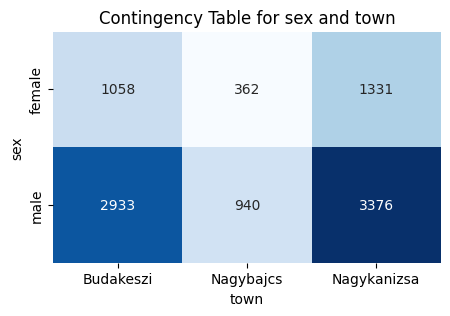


Chi-square test for independence between sex and occupation
Chi2 value: 202.46374668840508
P-value: 1.0853155210575159e-44


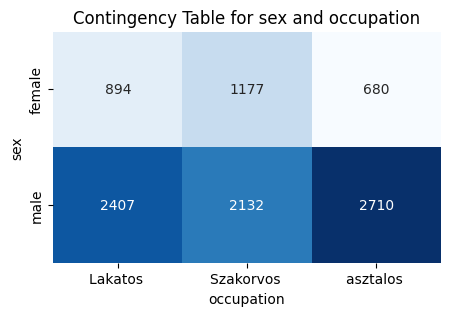


Chi-square test for independence between town and occupation
Chi2 value: 5.4917480050742045
P-value: 0.24045578937871775


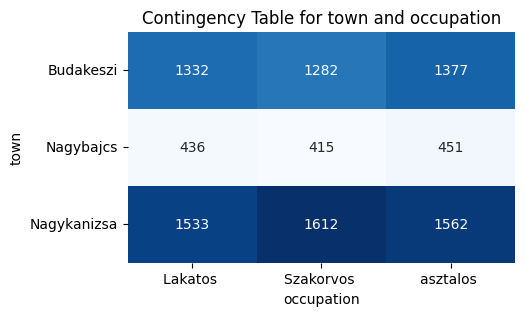

In [25]:
categorical_vars = df.select_dtypes(include=['object']).columns

# Iterate through all pairs of categorical variables
for i in range(len(categorical_vars)):
    for j in range(i + 1, len(categorical_vars)):
        variable1 = categorical_vars[i]
        variable2 = categorical_vars[j]

        # Create a contingency table
        contingency_table = pd.crosstab(df[variable1], df[variable2])

        # Perform the chi-square test for independence
        chi2, p, _, _ = chi2_contingency(contingency_table)

        # Print the results
        print(f"\nChi-square test for independence between {variable1} and {variable2}")
        print(f"Chi2 value: {chi2}")
        print(f"P-value: {p}")
        
        # Visualize the contingency table
        plt.figure(figsize=(5, 3))
        sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=False)
        plt.title(f'Contingency Table for {variable1} and {variable2}')
        plt.show()


Sex and occupation pair seems to be not independent. 

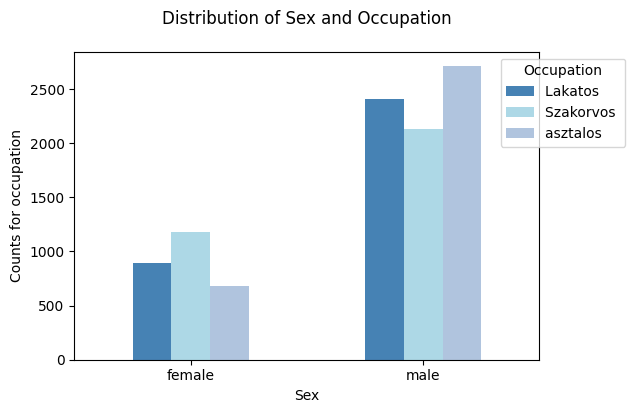

In [26]:
# Create a cross-tabulation DataFrame for 'sex' and 'occupation'
cross_tab_df = pd.crosstab(df['sex'], df['occupation'])

# Plotting
ax = cross_tab_df.plot(kind='bar', figsize=(6, 4), color=['steelblue', 'lightblue', 'lightsteelblue'])

# Labels and title
plt.xlabel('Sex')
plt.ylabel('Counts for occupation')
plt.xticks(rotation = 0)
plt.title('Distribution of Sex and Occupation', pad = 20)

# Legend
plt.legend(title='Occupation', loc='upper right', bbox_to_anchor=(1.2, 1))

# Show plot
plt.show()

Female, as expected, have lower employment rate, and among the occupations we can see that the "Szakorvos" occupation is the more popular. The "asztalos" is less frequent, while in the male case we have the opposite behaviour, and this make sense.

### Distribution plots

Here i plot some distributions, comparing the income variable with some of the other features.

In [27]:
df.columns

Index(['income_level', 'sex', 'age', 'town', 'occupation', 'height', 'sibling',
       'home', 'educ', 'travel', 'credit', 'cr sum', 'card', 'pastime',
       'changes', 'daily travel', 'travel mode', 'conscious', 'accounts',
       'sum', 'mobile', 'mobtime', 'car', 'internet', 'sport', 'vegan',
       'civil', 'polit', 'ill', 'medicine', 'doctor', 'covid', 'advert',
       'culture', 'food', 'children', 'rooms', 'valuables', 'cloths', 'jewels',
       'smoke', 'alcohol', 'music', 'face', 'twitter', 'online1', 'online2',
       'TV', 'refurb', 'move', 'travdest'],
      dtype='object')

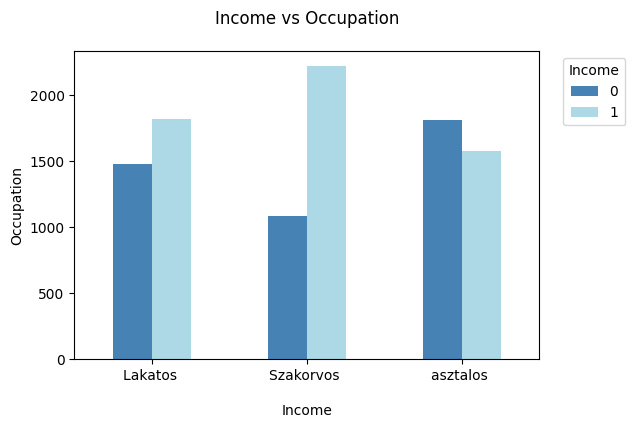

In [28]:
cross_income_occupation = pd.crosstab(df['income_level'], df['occupation'])

# Transpose the DataFrame to invert the axes
cross_income_occupation = cross_income_occupation.T

# Plotting
ax = cross_income_occupation.plot(kind='bar', figsize=(6, 4), color=['steelblue', 'lightblue', 'lightsteelblue'])

# Labels and title
plt.xlabel('Income', labelpad=15)
plt.ylabel('Occupation')
plt.xticks(rotation = 0)
plt.title('Income vs Occupation', pad = 20)

# Legend
plt.legend(title='Income', loc='upper right', bbox_to_anchor=(1.2, 1))

# Show plot
plt.show()

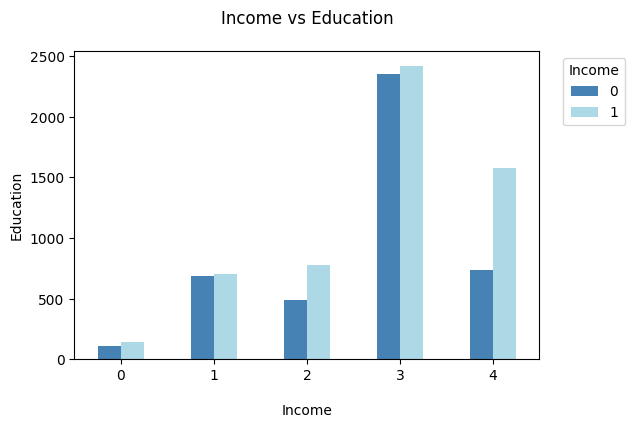

In [29]:
cross_income_educ = pd.crosstab(df['income_level'], df['educ'])

# Transpose the DataFrame to invert the axes
cross_income_educ = cross_income_educ.T

# Plotting
ax = cross_income_educ.plot(kind='bar', figsize=(6, 4), color=['steelblue', 'lightblue', 'lightsteelblue'])

# Labels and title
plt.xlabel('Income', labelpad=15)
plt.ylabel('Education')
plt.xticks(rotation = 0)
plt.title('Income vs Education', pad = 20)

# Legend
plt.legend(title='Income', loc='upper right', bbox_to_anchor=(1.2, 1))

# Show plot
plt.show()

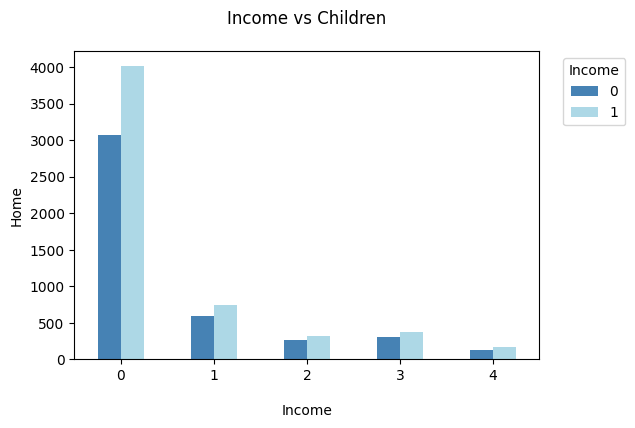

In [30]:
cross_income_children = pd.crosstab(df['income_level'], df['children'])

# Transpose the DataFrame to invert the axes
cross_income_children = cross_income_children.T

# Plotting
ax = cross_income_children.plot(kind='bar', figsize=(6, 4), color=['steelblue', 'lightblue'])

# Labels and title
plt.xlabel('Income', labelpad=15)
plt.ylabel('Home')
plt.xticks(rotation = 0)
plt.title('Income vs Children', pad = 20)

# Legend
plt.legend(title='Income', loc='upper right', bbox_to_anchor=(1.2, 1))

# Show plot
plt.show()

## Clustering and classification


Below we will perform clustering and classification on the provided data set. 

1. The first technique doesn't rely on labeled training data. The algorithm identifies patterns or structures within the data without prior knowledge of the classes.

2. The second one requires labeled training data to learn the relationship between input features and target labels.

Even though these techniques normally serve different purposes and are applied in different scenarios, will be used here for the same goal: I want to clusterize / classify the observations according to the income_level variable.

Thus, in the end, by looking at and evaluating the results, we will be able to assess which methods and techniques work well with this kind of data.

Here I am defining features vector and the target vector as follow

In [40]:
# Features vectos
X = df_encoded.drop(['income_level'], axis = 1)

# Target variable 
Y = df_encoded['income_level']

### Unsupervised Learning

In order to perform the cluster analysis with the k-means, I have to compute the dimensionality reduction first, otherwise i won't be able to find clusters and plot the results.

#### PCA

When performing the PCA, we have to 
- standardize the features vector and then apply the PCA function.

- understand the optimal number of components for keeping the relevant information and not lose important oneat 

- fit the function



In [ ]:
# Standardize the Feature vector
X_std = StandardScaler().fit_transform(X)

In [ ]:
# Create a PCA instance: pca
n_components = 10
pca = PCA(n_components = n_components)
principal_components = pca.fit_transform(X_std)

# Plot the explained variances in order to find the optimal number of components
PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize=(6,4))
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='#3ea2b5')
plt.title('Scree Plot', fontsize= 12, color = 'black', y=1.05, pad=10)
plt.xlabel('Principal Component')
plt.ylabel('Explained variance')
plt.grid(True)

2 seems to be a reasonable number of components.

In [ ]:
# PCA
nc=2
pca = PCA(n_components=nc)
X_pca = pca.fit_transform(X_std)

#### K-means

In [ ]:
# Function to calculate WCSS for a range of values of k
def calculate_wcss(data, max_k):
    wcss = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

# Specify the maximum number of clusters to consider
max_clusters = 15

# Calculate WCSS for different values of k
wcss_values = calculate_wcss(X_pca, max_clusters)

# Plot the elbow curve
plt.figure(figsize=(5, 3))
plt.plot(range(1, max_clusters + 1), wcss_values, marker='o', linestyle='-', color='#3ea2b5')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

Below the perfroming of the k-means with 

In [185]:
# Color palette
cluster_color_palette = ['#61bdcd', '#0d6dae', '#f988ad', '#e84a9b', '#00246d', '#74c476']
silhouette_cmap = ListedColormap(cluster_color_palette)


# Silhouette Analysis for diferent number of clusters
for k in range(2, 6):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Run the kmeans algorithm
    km = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    y_pred_km = km.fit_predict(X_pca)
    centroids = km.cluster_centers_

    # Get silhouette
    silhouette_vals = silhouette_samples(X_pca, y_pred_km)

    # Silhouette coefficients are calculated for each data point
    y_ticks = []
    y_lower = y_upper = 0
    for i, cluster in enumerate(np.unique(y_pred_km)):
        cluster_silhouette_vals = silhouette_vals[y_pred_km == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)

        ax[0].barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1, color = silhouette_cmap(i))
        ax[0].text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score --> vertical dashed line
    avg_score = silhouette_score(X_pca, y_pred_km)
    ax[0].axvline(avg_score, linestyle='--', linewidth=2, color='blue')
    ax[0].set_yticks([])
    ax[0].set_xlim([-0.1, 1])
    ax[0].set_xlabel('Silhouette coefficient values')
    ax[0].set_ylabel('Cluster labels')
    ax[0].set_title('Silhouette plot for the various clusters')

    # Scatter plot of data colored with labels
    ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=[cluster_color_palette[i] for i in y_pred_km])
    ax[1].scatter(centroids[:, 0], centroids[:, 1], marker='X', c='k', s=250)
    ax[1].set_xlabel('PC1')
    ax[1].set_ylabel('PC2')
    ax[1].set_title('Visualization of clustered data', y=1.02)

    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}', fontsize=16, fontweight='semibold' )

plt.show()


: 

As we can see by the Elbow Method for choosing the optimal number of clusters and by the silhouette analysis, this method is not the best for our task.

The income level variable is a binary one, so the clustering method should identify 2 groups based on the characteristics of the features. Remember that i have performed the PCA, so the features on which the k-means is working are the combinations of the original ones.

### Supervised Learning

In order to perform the ML tools, I have to split the data set in train and test set. It is also important to standardize the data by scaling it. 

In [41]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### k-Nearest Neighbors (KNN)

Here the implementation of the KNN. In the begenning I tried to understand the best value for n; however the plot of the scores seems to be very irregular and the accuracy scores are not changing a lot across the different k values.

We use cross-validation to find the accuracy scores, which means we don’t need to use a training and test split, but we do need to scale our data. We then loop over the values and add the scores to our list. We'll use train and test sets later, when the choiche of the k value is made.

In [ ]:
# Possible k values
k_values = [i for i in range (1,31)]
scores = []

# Computing the scores
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k,  weights= 'uniform')
    score = cross_val_score(knn, X, Y, cv=5)
    scores.append(np.mean(score))

# Plotting
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

The final KKN implementation.

In [ ]:
# KNN instance
knn = KNeighborsClassifier(n_neighbors=5, weights= 'distance')

# KNN fitting
knn.fit(X_train, y_train)

# KNN predictions
y_pred_knn = knn.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)

print("Accuracy:", round(accuracy,3))
print("Precision:", round(precision,3))
print("Recall:", round(recall,3))
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Plotting the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['0', '1'],
                yticklabels=['0', '1'])
plt.title(f'Confusion Matrix for the KNN')
plt.xlabel('Predicted label', labelpad= 30)
plt.ylabel('True label', labelpad= 30)
plt.show()

#### Logistic regression

As second tecnique, I will perform the Logistic Regression, which is a statistical method used for binary classification.

In [ ]:
# Create a logistic regression model
logistic_reg = LogisticRegression(C = 0.01, class_weight = None, penalty = 'l2', solver = 'liblinear')

# Train the model
logistic_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = logistic_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
conf_matrix = confusion_matrix(y_test, y_pred_lr)

print("Accuracy:", round(accuracy,3))
print("Precision:", round(precision,3))
print("Recall:", round(recall,3))

# Plotting the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['0', '1'],
                yticklabels=['0', '1'])
plt.title(f'Confusion Matrix for the Logistic Regression')
plt.xlabel('Predicted label', labelpad= 30)
plt.ylabel('True label', labelpad= 30)
plt.show()

#### Decision Tree

In [ ]:
# Create a Decision Tree Classifier
dec_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 5, min_samples_split = 2, random_state = 0)

# Train the model
dec_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dec= dec_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
conf_matrix = confusion_matrix(y_test, y_pred_lr)


#### Random Forest

In [ ]:
# Create a Random Forest Classifier
rnd_forest = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model
rnd_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rnd= rnd_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
conf_matrix = confusion_matrix(y_test, y_pred_lr)

#### SVM 

In [ ]:
# Create a Support Vector Machine Classifier
svm = SVC(kernel='rbf', C=0.1, gamma=0.1, random_state=0)

# Train the model
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm.predict(X_test)


#### Evaluation

In [ ]:
# Create lists to store metric values
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'KNN', 'Decision Tree']
accuracy_scores = []
recall_scores = []
fbeta_scores = []

# Evaluate each model and store metric values
predictions = [y_cls_logreg, y_cls_rand, y_cls_svm, y_cls_knn, y_cls_decision, y_cls_adaboost, y_cls_gaussian]

for y_pred in predictions:
    acc = round(accuracy_score(y_test_cls, y_pred) * 100, 3)
    recall = round(recall_score(y_test_cls, y_pred, average='micro') * 100, 3)
    fbeta = round(fbeta_score(y_test_cls, y_pred, average='micro', beta=2) * 100, 3)
    
    accuracy_scores.append(acc)
    recall_scores.append(recall)
    fbeta_scores.append(fbeta)

# Create a DataFrame with the metric values for each model
data = {
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Recall': recall_scores,
    'F-beta (beta=2)': fbeta_scores
}

metrics_df = pd.DataFrame(data)

## Other dimensionality reduction

### Multivariate scaling

Here the distance matrix is computed automatically by the function, which default value for the dissimilarity paramater is "euclidean". So the `MDS` function computes pairwise Euclidean distances between points in the dataset.

First I select a subset from the original dataframe becasue otherwise the computational time would be too high.

In [ ]:
# Set the random seed for reproducibility
np.random.seed(42)

# Randomly shuffle the indices and select the first 1000 shuffled indices
shuffled_indices = np.random.permutation(df_encoded.index)
df_subset = df_encoded.loc[shuffled_indices[:2000]]

# Features vectors for the subset
X_subset = df_subset.drop(['income_level'], axis=1)

# Target variable for the subset
Y_subset = df_subset['income_level']

# Reindex both X_subset and Y_subset
X_subset.reset_index(drop=True, inplace=True)
Y_subset.reset_index(drop=True, inplace=True)

# Perform multi-dimensional scaling
embedding = MDS(n_components=4, metric = False, random_state = 42,normalized_stress = 'auto')
X_transformed = embedding.fit_transform(X_subset)

# New shape
print("New shape: ", X_transformed.shape)

# Create a dataframe
df_mds =pd.DataFrame({
                    'Dim1': pd.Series(X_transformed[:,0]),
                    'Dim2': pd.Series(X_transformed[:,1]),})

# Plot the results
plt.figure(figsize=(8, 4))
sns.scatterplot(x= 'Dim1', y= 'Dim2', data = df_mds, palette=['#a8ddb5', '#e377c2'], s=50)
plt.title('MDS and K-means Scatter Plot')
plt.show()

### Factor analysis